# Section 1

------
# Project: Problem Statement - Credit Card Customer Segmentation

 AllLife Bank wants to focus on its credit card customer base in the next financial year. 
They have been advised by their marketing research team, that the penetration in the market can be improved.
Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as 
upsell to existing customers. Another insight from the market research was that the customers perceive the support 
services of the back poorly. 
Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


In [1]:
# important librires 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('Credit Card Customer Data (1).xlsx', index_col='Sl_No')

# Exploratory Data Anaylsis

In [2]:
# lets try to look the data
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [3]:
# lets try to check the shape of data
df.shape

(660, 6)

In [4]:
# check the column names of data
print(df.columns.tolist())

['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


In [5]:
# lets try to check the general information of all columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


# Descriptive Anaylsis

In [6]:
# The## Exploratory Data Anaylsis describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types):
# number of non-missing values, mean, standard deviation,range, median, 0.25 and 0.75 quartiles. 
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Since clustering methods use distance metrics I will create a scaled copy of the data.

In [7]:
# Standard Scaling to scale the data
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
df_scaled[:] = StandardScaler().fit_transform(df_scaled)
df_scaled.drop('Customer Key', axis=1, inplace=True)
cols = list(df_scaled.columns)
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,
1,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
2,0.410293,-0.787585,-1.473731,2.520519,1.891859
3,0.410293,1.058973,-0.860451,0.134290,0.145528
4,-0.121665,0.135694,-0.860451,-0.547490,0.145528
5,1.740187,0.597334,-1.473731,3.202298,-0.203739


# Data Visualization

# Univariate Analysis


In [8]:
# important librires for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Average credit limit:

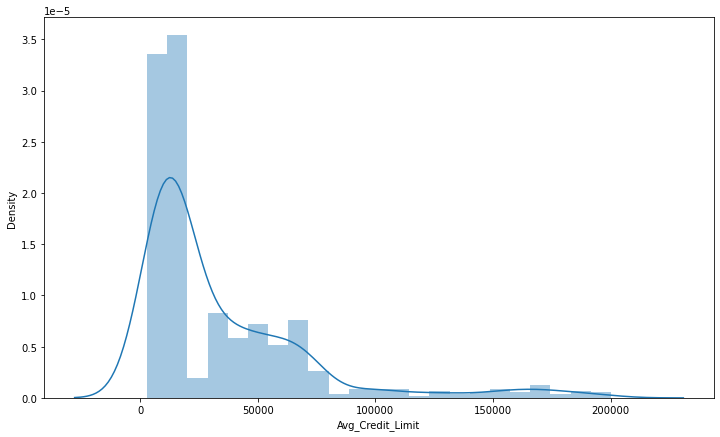

In [9]:
# Average credit limit majority of records do not have credit or have a low limit
plt.figure(figsize=(12,7))
sns.distplot(df.Avg_Credit_Limit);
plt.show()

### Total credit cards:

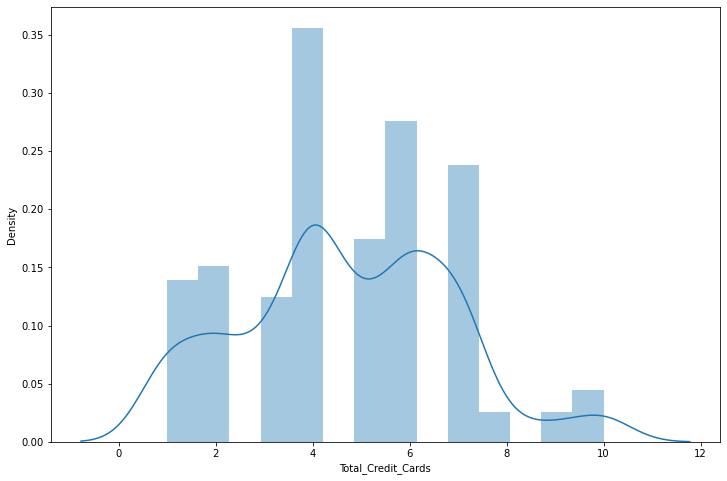

In [10]:
# Total credit cards Looks to be normally distributed. I can't help but wonder, why do some many users have more than one credit card?
plt.figure(figsize=(12,8))
sns.distplot(df.Total_Credit_Cards);
plt.show()

### Total bank visits

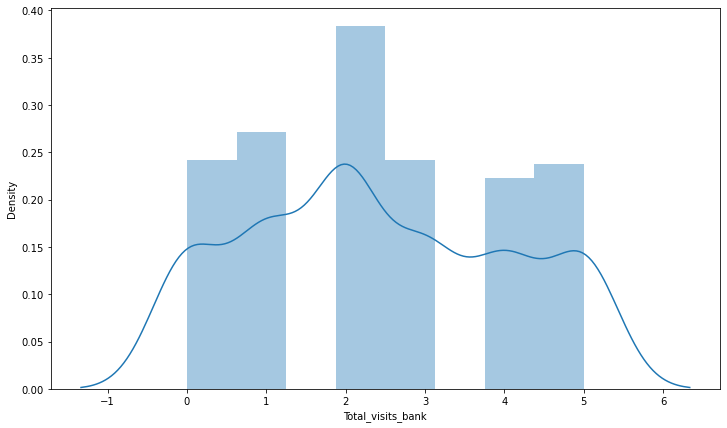

In [11]:
# Total bank visits Once again, normally distributed variable.
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_bank);
plt.show()

### Total calls made:

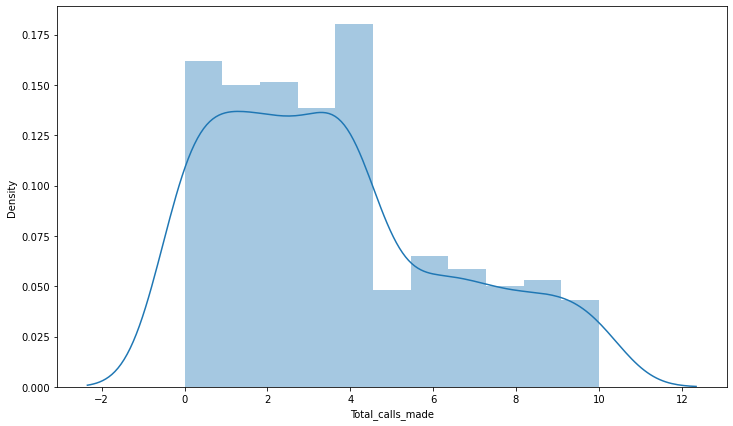

In [12]:
# Total calls made The total number of calls made by the customer.
plt.figure(figsize=(12,7))
sns.distplot(df.Total_calls_made);
plt.show()

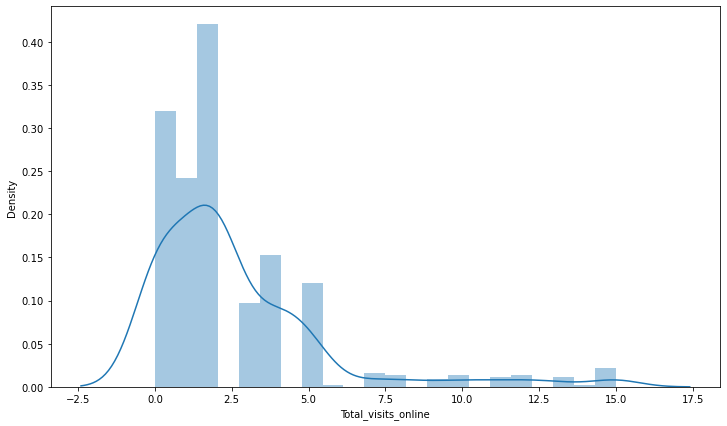

In [13]:
# Total_visits_online
plt.figure(figsize=(12,7))
sns.distplot(df.Total_visits_online);
plt.show()

# Bivariate Analysis

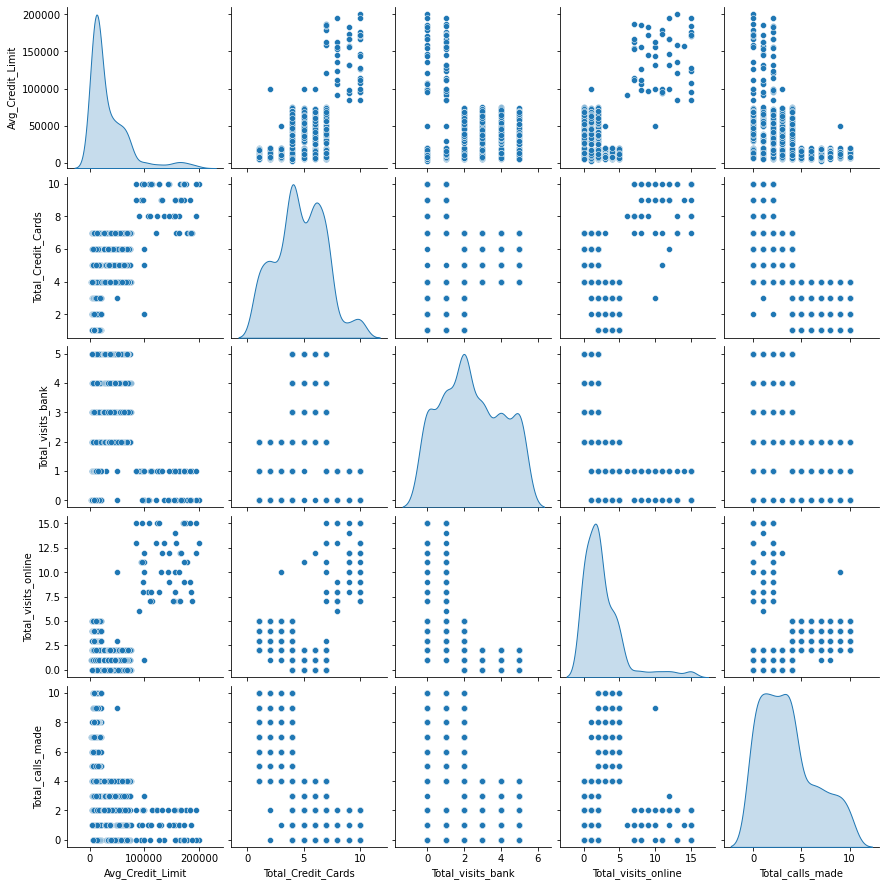

In [14]:
# The two bivariate plots below are useful to see what amount of feature interaction is present.
sns.pairplot(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');
plt.show()

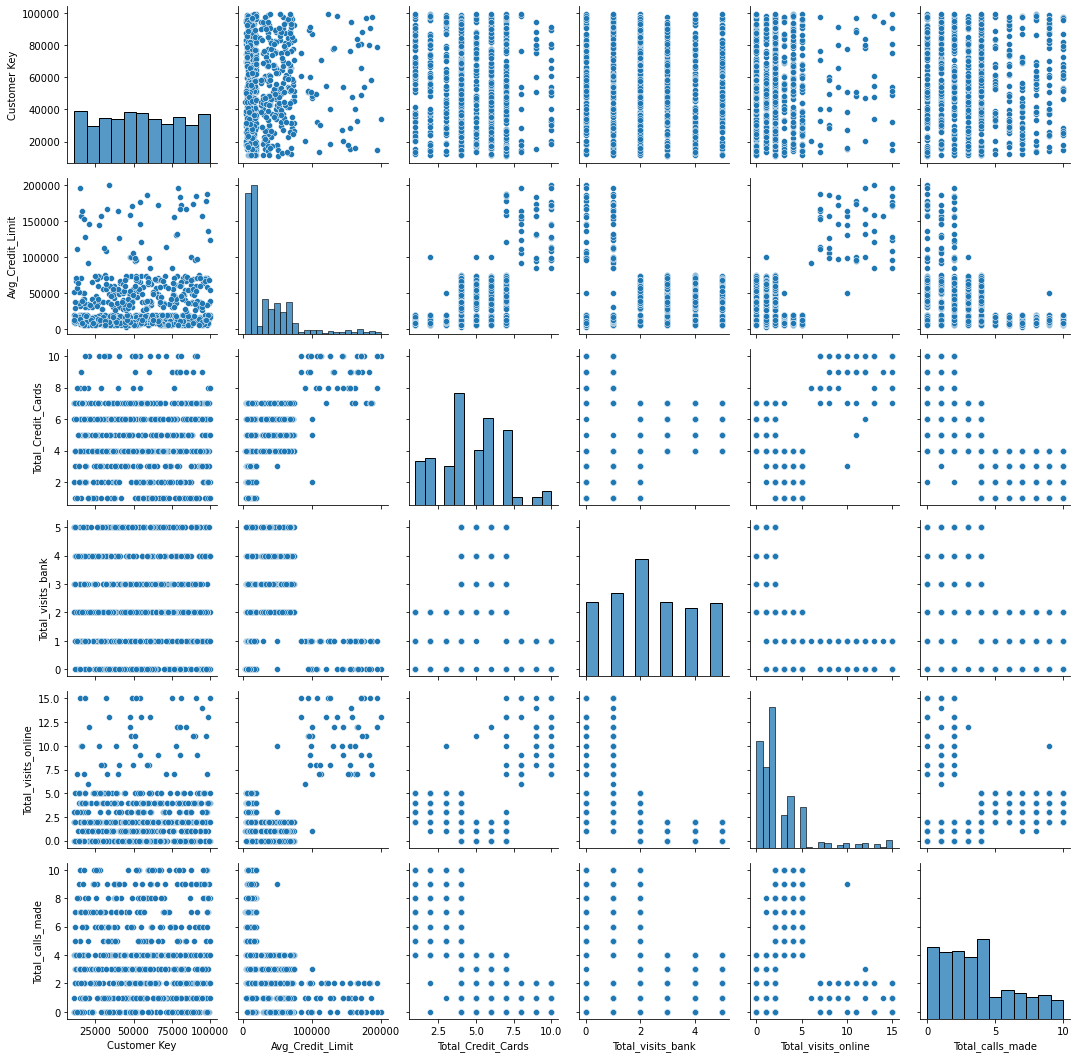

In [15]:
# pariGrid plot
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

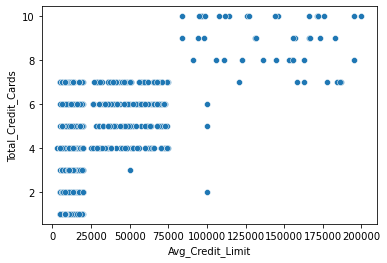

In [16]:
# Realtinship between Avg_credit_limit vs Total_Credit_Cards
sns.scatterplot(data=df, x="Avg_Credit_Limit", y="Total_Credit_Cards")
plt.show()

# Ssection 2

Key meaningful observations on individual variables and the relationship between 
variables

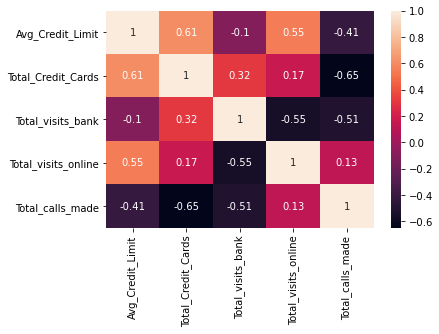

In [17]:
# Correlation
sns.heatmap(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

### Contact method:
A hypothesis that I had going into this was that there would be three clusters for contact method, where customers would stick to their preferred method for interacting with their bank (online, in person, and through the phone).

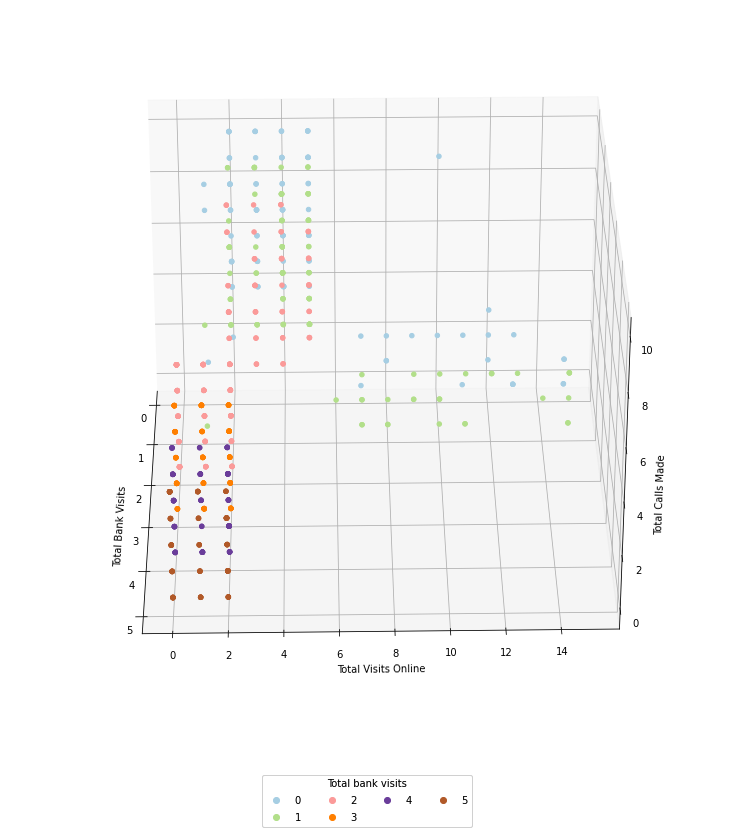

In [18]:
# Below we can see a 3D rotating scatter plot which shows my hypothesis was correct
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(10,10))

ax = Axes3D(fig)



x = df.Total_visits_bank
y = df.Total_visits_online
z = df.Total_calls_made


g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('Total Bank Visits')
ax.set_ylabel('Total Visits Online')
ax.set_zlabel('Total Calls Made')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="Total bank visits", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

# plt.show()

from matplotlib import animation

def rotate(angle):
     ax.view_init(azim=angle)

angle = 1
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=1)
ani.save('Cluster_plot.gif', writer=animation.PillowWriter(fps=25));

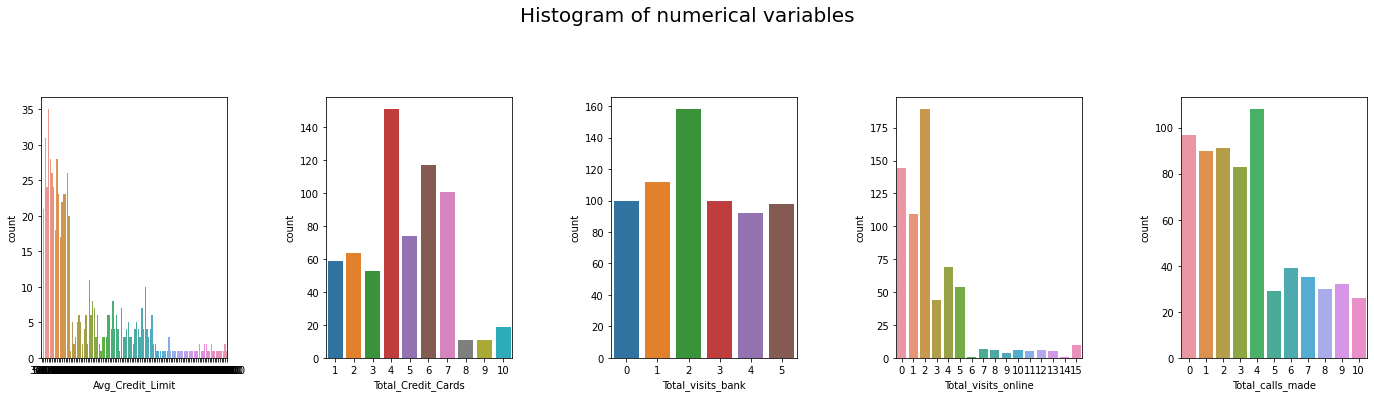

In [19]:
# histograms for individual variables
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=4.0)

In [20]:
# statistics analysis on indivisual variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


# Section 3
Data preprocessing


Prepare the data for analysis - Feature engineering - Missing value treatment - 
 Duplicate observations check

# Feature Engineering

In [21]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values 
# and type against each column.
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    ## Exploratory Data Anaylsis
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'percentage high one category values', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,percentage high one category values,type
0,Customer Key,655,0.0,0.303030,int64
1,Avg_Credit_Limit,110,0.0,5.303030,int64
2,Total_Credit_Cards,10,0.0,22.878788,int64
3,Total_visits_bank,6,0.0,23.939394,int64
4,Total_visits_online,16,0.0,28.636364,int64
5,Total_calls_made,11,0.0,16.363636,int64


In [22]:
# lets try to remove columns with percentage of high one category values and high missing values.
# Removing colums with 90% features with one category only and 90% features with missing values
good_cols = list(df.columns)
for col in df.columns:
    
    #remove columns with high NA rate
    na_rate = df[col].isnull().sum()/ df.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = df[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > 0.9 and unbalanced_rate > 0.9:
        good_cols.remove(col) 

In [23]:
# extract a good columns
df2 = df[good_cols]

In [24]:
df2.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


# Missing values treatment

In [25]:
# lets try to check the missing values of each column in a dataset 
df.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There is no missing value in our dataset

# checking the duplicate entries

### Customer Key and Sl_No
Initially, I believed that these two features were redundant, that Customer key was the intended primary key for a database but that Sl_No was generated when the data was added to a SQL like database but the user failed to explicitly state the primary key so a new one was generated. Strangely enough, the duplicate records for Customer Key don't match up, this may be that a record was added to the database when the intent was actually to update an existing record, another possibility may be that these are cases of identity theft, or possibly just joint accounts where the Customer Key is shared but not the Sl_No.

------
I now know that the duplicate entries are updated records, I will leave in the dataset for now as they consist of less than 1% of the total amount of data, they aren't outliers, and they will be useful for proving a point at the end of this project. 

In [26]:
#checking the duplicate entries for Customer Key
gb_df = df.groupby('Customer Key').count()
print('There are',gb_df.loc[gb_df.Total_calls_made >=2].shape[1], 'duplicate entries for Customer Key')

for k in list(gb_df.loc[gb_df.Total_calls_made >=2].index):
    display(df.loc[df['Customer Key'] == k])

There are 5 duplicate entries for Customer Key


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
49,37252,6000,4,0,2,8
433,37252,59000,6,2,1,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
5,47437,100000,6,0,12,3
333,47437,17000,7,3,1,0


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
412,50706,44000,4,5,0,2
542,50706,60000,7,5,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
392,96929,13000,4,5,0,0
399,96929,67000,6,2,2,2


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
105,97935,17000,2,1,2,10
633,97935,187000,7,1,7,0



# Section 4 & 6
Applying K-means clustering


<a id="part-two"></a>
## K-means


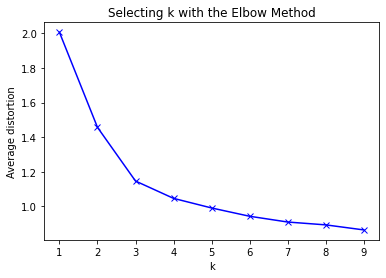

In [27]:
# First, we want to iterate through and view the performance of each value of K for K-means, then using a linegraph to 
# find the elbow of the plot we can select the optimal number of clusters.
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(range(1, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');
plt.show()

In [28]:
# kmeans clusters 
model = KMeans(n_clusters=3)
model.fit(df_scaled)
preds = model.predict(df_scaled)

In [29]:
# clearly Clusters distinguished
from sklearn.metrics import silhouette_score
labels = model.labels_
print('clearly Clusters distinguished are')
silhouette_score(df_scaled, labels, metric='euclidean')

clearly Clusters distinguished are


0.5157182558881063

In [30]:
df['Kmean_grouping'] = preds #here we add the predictions to the unscaled data so that we can gain some real world interpretability.
df_scaled['Kmean_grouping'] = preds

df.groupby('Kmean_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmean_grouping,,,,,,
0,224,224,224,224,224,224
1,386,386,386,386,386,386
2,50,50,50,50,50,50


Below we see the average values for each feature in each cluster, the final row of the dataframe is the mean value for each column (since this data is unscaled we can use this to determine how big of a step each of these means is from one another).

It would appear my hypothesis of the clusters forming along query method has proven correct. If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards. The customers who prefer in-person interactions tend to have the least number of credit cards and the lowest credit limit. The customers who contact via phonecall are in the middle.

One additional observation is that if we tally up the number of interactions per group (how many times they have used online, phone, or in-person services) we see the in-person customers appear to be the most active. This was the opposite of my initial expectations as visiting a bank in person has the highest friction (effort required) to complete. 
 

In [31]:
# Kmean_grouping
_ = df.groupby('Kmean_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index = ['Phone', 'Online', 'In person', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
Phone,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,NaN
Online,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,NaN
In person,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,NaN
Mean,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317,0.588364


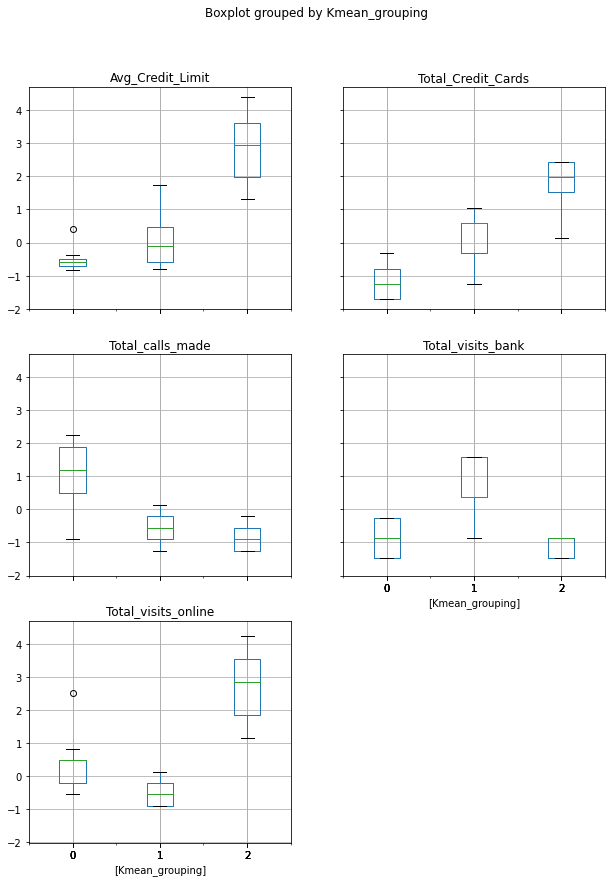

In [32]:
#BoxPlot Grouped by Kmean_grouping
df_scaled.boxplot(by='Kmean_grouping', layout=(3,2), figsize=(10,14));

In [33]:
# drop kmean_grouping
df_scaled.drop('Kmean_grouping', inplace=True, axis=1)

# Section 5 & 6
Applying Hierarchical clustering

<a id="part-three"></a>
## Hierarchical Clustering

For hierarchical clustering, we begin by evaluating the cophenetic coefficients for each linkage type and also each affinity/metric. Below is a list of said outcomes, ignoring any combination that scores poorly, and ignoring any combination that will result in an error. It's worth noting that scipy has more options than sklearn does for metrics and linkages. While there are several good combinations, I will pick euclidean for the metric and average for linkage as these are options in both scipy and sklearn.

In [34]:
#  Below is a list of said outcomes, ignoring any combination that scores poorly, 
# and ignoring any combination that will result in an error.
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

links = ['ward', 'complete', 'average', 'single', 'weighted', 'centroid', 'median']
affs = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean']

for aff in affs:
    for link in links:
        if link == 'ward' and aff != 'euclidean':
            pass
        elif link == 'centroid' and aff != 'euclidean':
            pass
        elif link == 'median' and aff != 'euclidean':
            pass
        else:
            Z = linkage(df_scaled[cols], metric=aff, method=link)
            c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
            if c > .75:
                print('affinity:',aff, ', link:',link,':', c)

affinity: braycurtis , link: single : 0.8502845518924395
affinity: canberra , link: single : 0.7566178713003985
affinity: chebyshev , link: complete : 0.8533474836336782
affinity: chebyshev , link: average : 0.8974159511838106
affinity: chebyshev , link: weighted : 0.8913624010768603
affinity: cityblock , link: complete : 0.8731477899179829
affinity: cityblock , link: average : 0.896329431104133
affinity: cityblock , link: weighted : 0.8825520731498188
affinity: euclidean , link: complete : 0.8599730607972423
affinity: euclidean , link: average : 0.8977080867389372
affinity: euclidean , link: weighted : 0.8861746814895477
affinity: euclidean , link: centroid : 0.8939385846326323
affinity: euclidean , link: median : 0.8893799537016724
affinity: mahalanobis , link: average : 0.8326994115042136
affinity: mahalanobis , link: weighted : 0.7805990615142518
affinity: minkowski , link: complete : 0.8599730607972423
affinity: minkowski , link: average : 0.8977080867389372
affinity: minkowski , 

Next, I need to decide on the number of clusters. There are two methods I use here to reach my conclusion, the first plot shows the silhouette score by the number of clusters. Based on this I would not want more than 4 clusters as the score gets too low. The second plot is the dendrogram, which plots the merging of the groups base on distance. The dendrogram shows a long distance (the y axis) for the two final groups and each of the subsequent groups has a drastically shorter distance. This would suggest to me that there are two distinct groups under this method. 

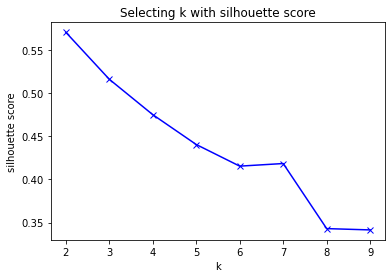

In [35]:
# need to decide on the number of clusters AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

meanDistortions=[]

for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df_scaled)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df_scaled, prediction))


plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');
plt.show()

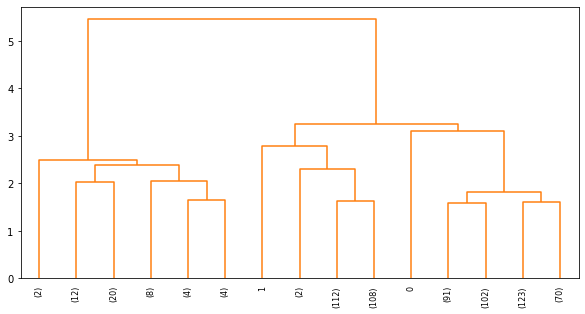

In [36]:
Z = linkage(df_scaled[cols], metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_scaled[cols]))
plt.figure(figsize=(10, 5))

dendrogram(Z, p=15, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.)
plt.show()

This method resulted in two clusters, with one cluster containing only 8% of the total records. It is also worth noting that the online user segment matches the same online user segment from Kmeans. Interestingly enough this division seems to be the users who prefer internet transactions and those who do not. Once again, online users have more credit cards and a larger credit limit.

Not shown below: when using 3, 4, 5, or 6 clusters, all but two of the clusters have less than five records. Obviously, such clusters don't provide meaningful data. 


In [37]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(df_scaled)
preds=model.labels_
df['hc_grouping'] = preds
df_scaled['hc_grouping'] = preds

df.groupby('hc_grouping').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping
hc_grouping,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


In [38]:
_ = df.groupby('hc_grouping').mean().append(pd.DataFrame(df.std()).T)
_.index=['Offline','Online', 'Mean']
_

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_grouping,hc_grouping
Offline,55012.97541,25847.540984,4.375410,2.550820,1.926230,3.788525,0.632787,NaN
Online,56708.76000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,NaN
Mean,25627.77220,37625.487804,2.167835,1.631813,2.935724,2.865317,0.588364,0.264811


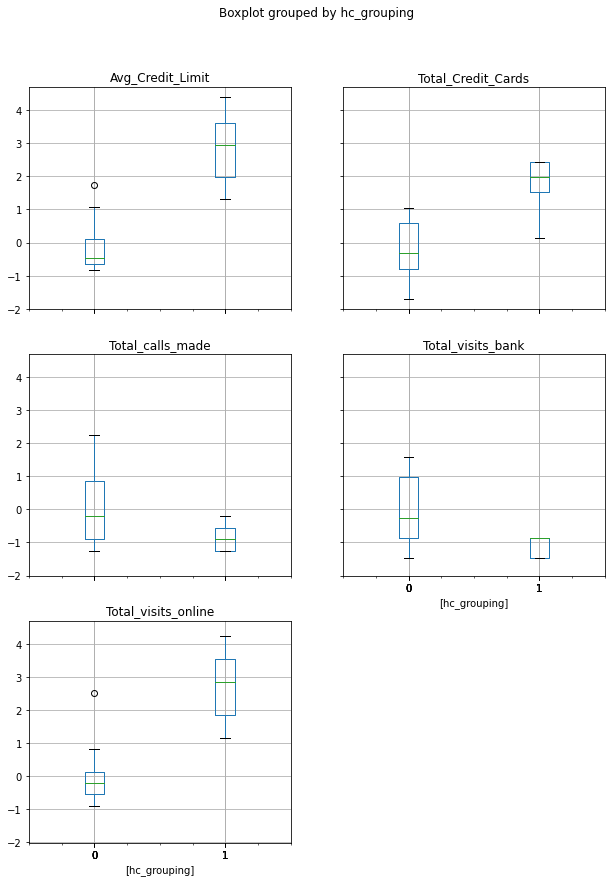

In [39]:
df_scaled.boxplot(by='hc_grouping', layout=(3,2), figsize=(10,14));

# Section 7 & 8

<a id="part-four"></a>
## Key Questions

    How many different segments of customers are there?
    How are these segments different from each other?
    What are your recommendations to the bank on how to better market to and service these customers?
    
Arguably, there are three distinct categories of customers:
* In-person users: prefer to handle bank transactions in person. They have the fewest credit cards and the lowest available credit. They are also the most active users.
* Phone users: prefer verbally handling transactions remotely.
* Online users: prefer digital transactions. They also have the most credit cards and the highest available credit.

We can tailor contact methods to these customer preferences. Online/phone users will probably prefer email/text notifications, while in-person users mail prefer mail notifications and upselling (when at the bank location). Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our next ad campaign, focusing on digit recruiting.
 


#  All key insights and recommendations

Business can offer better phone service to these customers as they are a sizeable percentage of population. 
Feedback on service delivery can be requested from customers to improve perception of delivery. 
New customers could be added to this category by offering cards with low credit limit. 
They can be offered more credit cards as their credit card utilization is low.

Business can offer better in person service to these customers as they are a sizeable percentage of population. 
They can be offered more information about online banking for some services, keeping their convenience in mind.

Business can look to add more customers in this category, as this cluster is a small percentage of the customers population.

Business can contact these customers to offer credit cards or to get feedback about service.

We can tailor contact methods to these customer preferences. Online/phone users will probably prefer email/text notifications,
while in-person users mail prefer mail notifications and upselling (when at the bank location). 
Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our 
next ad campaign, focusing on digit recruiting.
